In [2]:
#排除python因为版本不兼容而报错 ，统一成python3的格式
from __future__ import absolute_import, division, print_function, unicode_literals

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.0.0


In [23]:
#导入fashion mnist数据集
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
print("fashion_mnist 导入成功")

fashion_mnist 导入成功


In [24]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

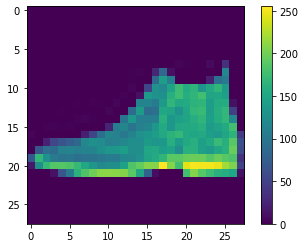

In [45]:
#预处理数据
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images = train_images / 255.0
test_imagesages = test_images / 255.0

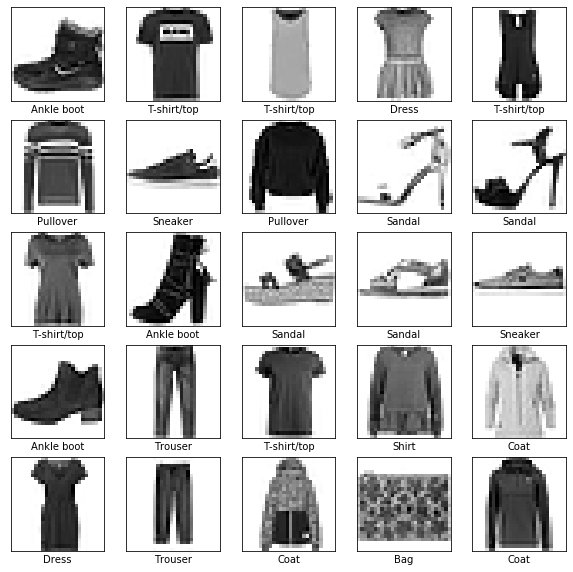

In [31]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [38]:
model.fit(train_images,train_labels,epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1736 - accuracy: 0.9335
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1679 - accuracy: 0.9364
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1656 - accuracy: 0.9378
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1608 - accuracy: 0.9391
Epoch 5/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1571 - accuracy: 0.9416
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1518 - accuracy: 0.9426
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1492 - accuracy: 0.9446
Epoch 8/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1458 - accuracy: 0.9451
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1427 - accuracy: 0.9462
Epoch 10/10
60

In [39]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("测试集 准确度 =  ", test_acc)

10000/1 - 0s - loss: 42.6760 - accuracy: 0.8649
测试集 准确度 =   0.8649


In [42]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
predictions = probability_model.predict(test_images)

In [47]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [51]:
class_names[test_labels[0]],class_names[np.argmax(predictions[0])]

('Ankle boot', 'Ankle boot')

In [76]:
#以图形的方式查看预测
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img = prediction_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                    color = color)
def plot_value_array(i, predictions_array, true_label):
    prediction_array, true_label = predictions_array, true_label[i]
    plt.grid(False)#不显示方格
    plt.xticks(range(10))#横坐标
    plt.yticks([])#纵坐标
    #柱形图
    thisplot = plt.bar(range(10), predictions_array, color="#677777")
    plt.ylim([0, 1])#设置x轴数据显示范围
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue') 

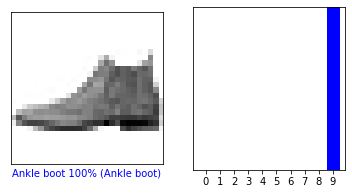

In [65]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

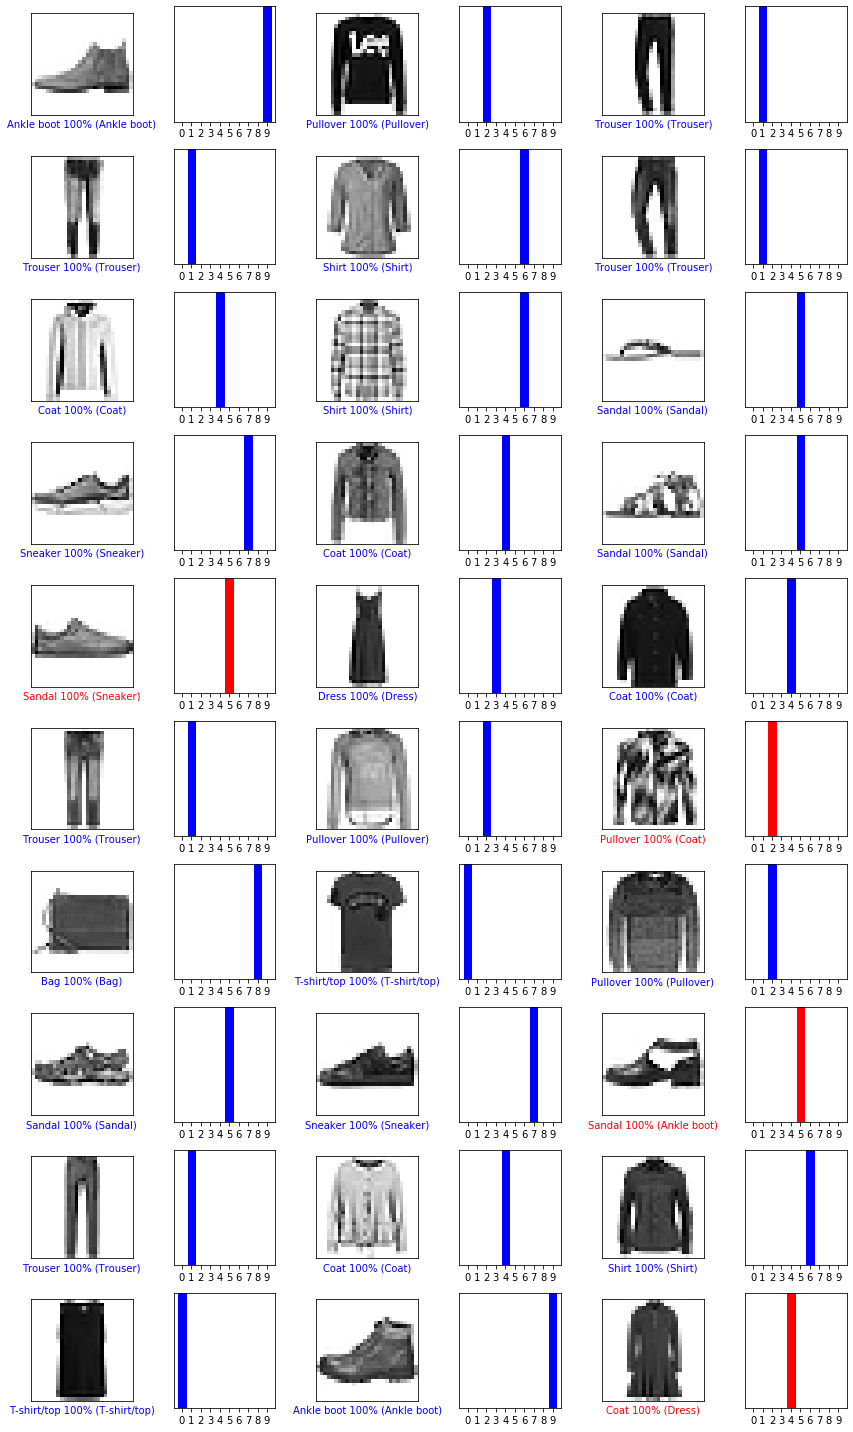

In [87]:
row = 10
col = 3
num = row * col
plt.figure(figsize=(2*2*col,2*row))
for i in range(num):
    plt.subplot(row,2*col,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(row,2*col,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域
plt.show()